In [1]:
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# DSC 10 - Final Exam Review

<img src="data/panda.jpg" width="800">

## The Final Exam

### Saturday, March 12th from 3-6PM

- administered remotely through gradescope (like the midterm)
- 2/3 of the exam will consist of topics covered after the midterm exam
- Check more details on Campuswire [post](https://campuswire.com/c/G6950E967/feed/1403)
- combination of multiple choice, true/false, filling in a numerical answer, and other short answer questions

## The Final Discussion

- The topics from the second part of the quarter was more *conceptual*.
- Here, we'll review the main concepts from second part of the quarter.

## Concept 1: Distributions

### Distributions

- A *ditribution* tells us the probability of each possible outcome.
- Often visualized with a *histogram*.

### Example

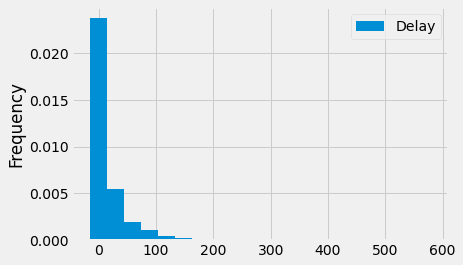

In [2]:
flights = bpd.read_csv('data/united_summer2015.csv')
flights.plot(kind='hist', y='Delay', bins=20, density=True)
plt.show()

## Concept 2: Sampling

### Populations and Samples

- The *population* is the "entire" data set. We don't usually see it.
- Instead, we see a *sample* whose size is smaller than the population.
- We usually obtain the sample *randomly*.

In [3]:
population = flights

### With/Without Replacement

- We have the option to randomly sample with/without replacement.

In [4]:
population.sample(2000, replace=True)

,Date,Flight Number,Destination,Delay
7135,7/18/15,1614,LAS,143
12237,8/20/15,1754,EWR,34
3982,6/27/15,1076,IAD,16
12502,8/22/15,1721,KOA,22
5797,7/9/15,1916,DEN,13
...,...,...,...,...
804,6/6/15,734,ORD,-1
12724,8/24/15,1060,SAT,-5
8299,7/26/15,743,BOS,33
4741,7/2/15,1252,MCO,14


### Examples

In each of the following experiments, 1) what is the population? 2) should we sample with or without replacement?

- Picking a team of 5 from a class of 100 people.
- Rolling a 6-sided die, 20 times.
- Randomly generating names for 100 babies born.

## Concept 3: Estimation

- We want to know some aspect (parameter) of the *population*.
    - Example: the average flight delay, or total number of planes produced
- We don't have the population, only a sample.
- So we try to *estimate* the parameter using the sample.

### Statistic

- A statistic is any number computed from a sample.
- We compute a *statistic* to *estimate* a population *parameter*.
- Example: sample mean flight delay.

### The Problem

- You randomly select a sample and compute your statistic.
    - Example: the sample mean flight delay is 14 minutes.
- Your hope: it is close to the "right answer" (the pop. mean).
- You can never know *exactly* how close it is without having the population.
- The power of statistics: you can say how *confident* you are that the population paramter lies within a certain distance.

### Sampling Distribution - Distribution of Possible Sample Statistics

- The sample is random; so your sample statistic is, too.
- I.e., it could have been different.
- The *sampling distribution* tells us the probability of those different outcomes.
- I.e., it tells us how different sample mean *could have been*.

In [5]:
observed_mean = population.sample(2000).get('Delay').mean()
observed_mean

16.141

### Simulating the Sampling Distribution

- Let's get more samples from the population, compute mean of each.
- **Problem**: In the real world we (usually) can't do this.

In [6]:
sample_means = np.array([])
for i in np.arange(1000):
    mean = population.get('Delay').sample(2000).mean()
    sample_means = np.append(sample_means, mean)

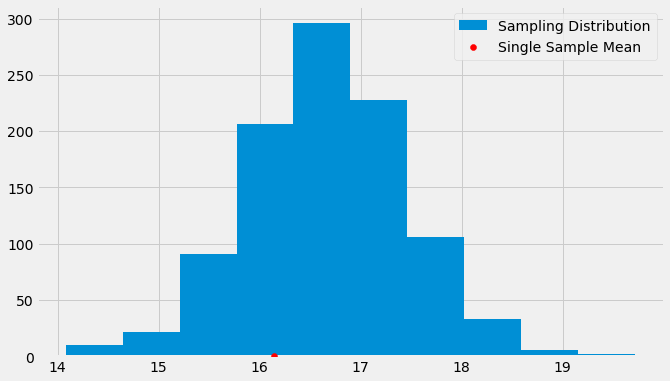

In [7]:
plt.rcParams["figure.figsize"] = (10,6)
plt.hist(sample_means, label='Sampling Distribution')
plt.scatter(observed_mean, 0, color='red', zorder=10, label='Single Sample Mean')
plt.legend()

### Sampling Distribution

- We'd love to know the sampling distribution.
- But we just have one sample.
- How do we approximate the sampling distribution with just one sample?
- Answers: the Bootstrap and the Central Limit Theorem

## Concept 4: The Bootstrap

### The Boostrap

- Problem: we want to know the sample distribution of our statistic, but we just have one sample.

In [8]:
original_sample = population.sample(2000)
# plt.hist(sample_means, alpha=.3, color='black', )
# plt.scatter(original_sample.get('Delay').mean(), 0, color='red', zorder=10, label='Single Sample Mean')

### Idea beind bootstrapping

- I wish I had the population; then I could get more samples:

In [9]:
another_sample = population.sample(2000)

- I don't have the population.
- But, the original sample probably looks like the population. Let's sample from it.

In [10]:
bootstrap_sample = original_sample.sample(2000, replace=True)

### Boostrapping and Replacement

- **Important**: when we get a boostrap sample, we sample *with* replacement. Why?
- If we didn't we'd just get the same data set back:

In [11]:
original_sample.sample(2000, replace=True).get('Delay').mean()

17.5075

### Bootstrapping and Duplicates

- If we sample with replacement, we'll get duplicates.
- This is OK! In fact, it is necessary - otherwise we would get the same sample mean every single time

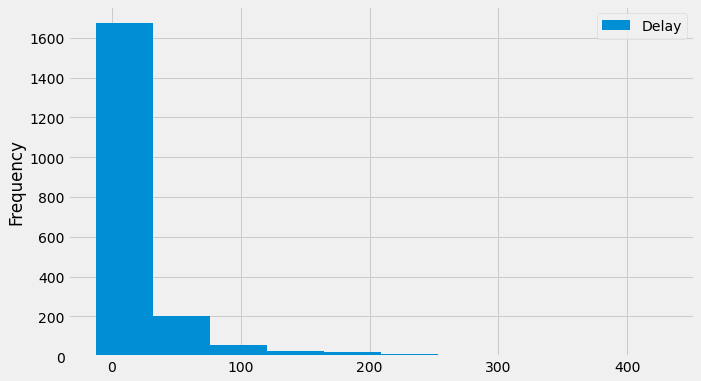

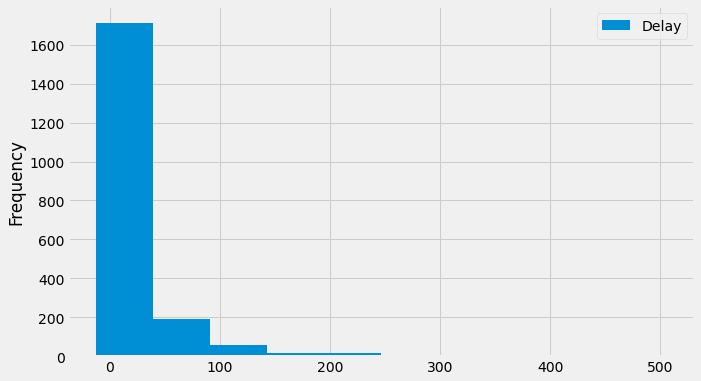

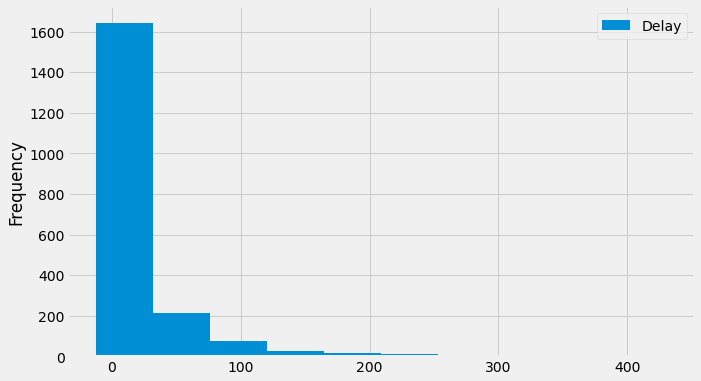

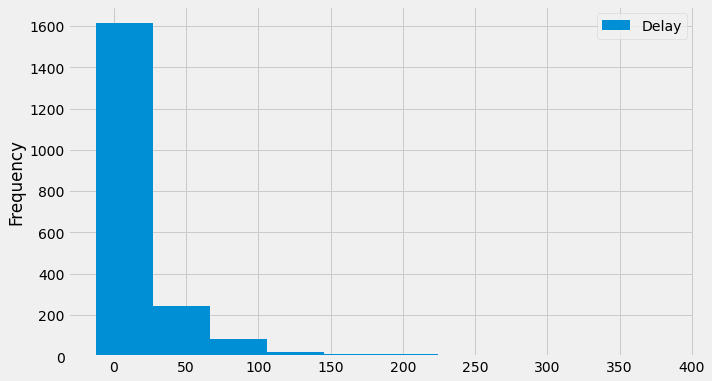

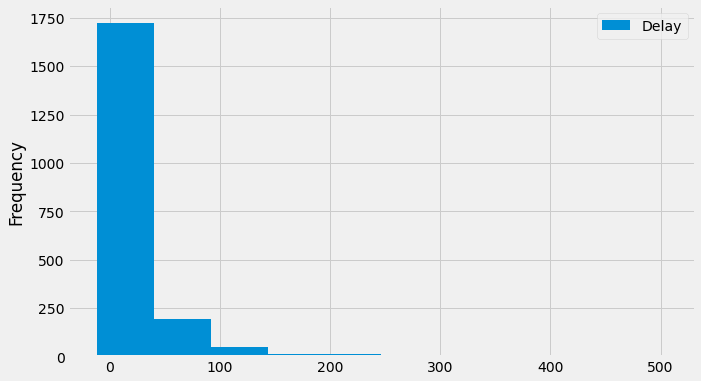

In [12]:
for i in range(5):
    original_sample.sample(2000, replace=True).plot(kind='hist', y='Delay')

### Example

In [13]:
bootstrap_sample_means = np.array([])
for i in np.arange(5000):
    bootstrap_sample_mean = original_sample.get('Delay').sample(original_sample.shape[0], replace=True).mean()
    bootstrap_sample_means = np.append(bootstrap_sample_means, bootstrap_sample_mean)

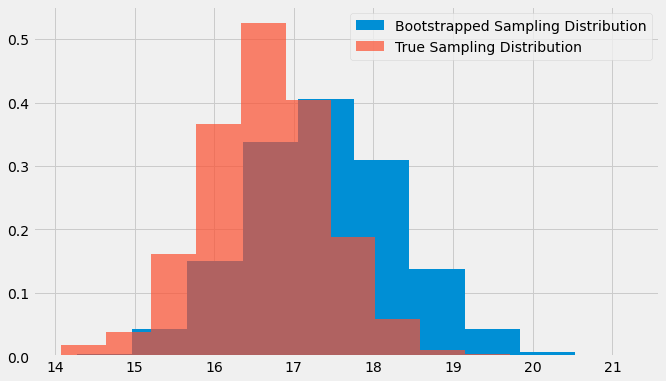

In [40]:
plt.hist(bootstrap_sample_means, density=True, label='Bootstrapped Sampling Distribution')
plt.hist(sample_means, density=True, alpha=.7, label='True Sampling Distribution')
plt.rcParams["figure.figsize"] = (10,6)
plt.legend()
plt.show()

Remember: `sample_means` contains means from sampling from the population, rather than bootstrapping

## Concept 5: The Central Limit Theorem

### The CLT

- Problem: we want to know the sample distribution of our statistic, but we just have one sample.

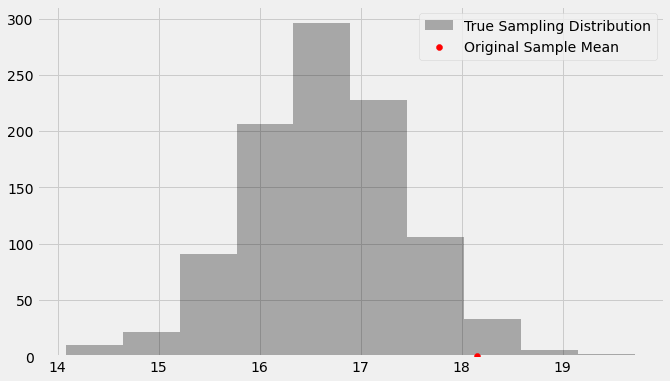

In [41]:
original_sample = population.sample(2000)
plt.hist(sample_means, alpha=.3, color='black', label='True Sampling Distribution')
plt.scatter(original_sample.get('Delay').mean(), 0, color='red', zorder=10, label='Original Sample Mean')
plt.legend()

### Idea

- The distribution of the *sample mean* will be (approximately) normal if the sample size is large enough.
- This is the **Central Limit Theorem**:

> The sampling distribution of the sample mean is approximately a normal curve, centered at the population mean ($\mu$), and with standard deviation equal to the population standard deviation over the square root of the sample size ($\frac{\sigma}{\sqrt{n}}$).

### CLT

- The CLT let's us approximate the sampling distribution of the mean without getting more samples or running the bootstrap.
- Small problem: we don't have the population mean/SD. That's OK, just use the sample mean and SD.

In [16]:
mu = original_sample.get('Delay').mean()
sigma = np.std(original_sample.get('Delay')) / (original_sample.shape[0])**(1/2)

### Careful!

- There are lots of distributions here. The population distribution, the sample distribution, and the distribution of the sample mean, each with their own mean / SD.

<AxesSubplot:ylabel='Frequency'>

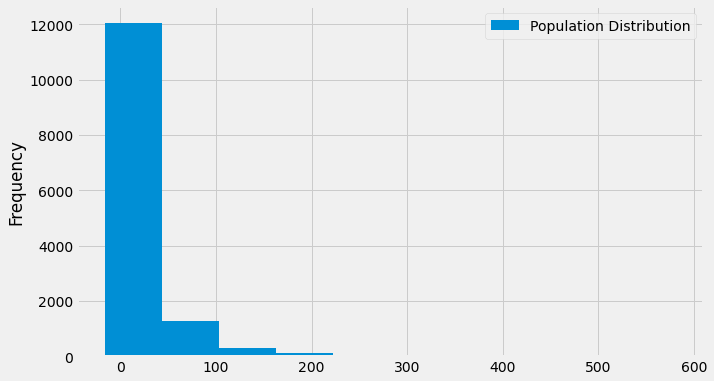

In [17]:
population.plot(kind='hist', y='Delay', label='Population Distribution')

<AxesSubplot:ylabel='Frequency'>

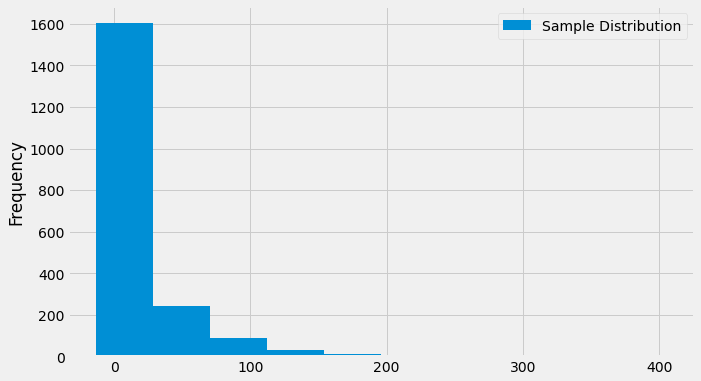

In [18]:
original_sample.plot(kind='hist', y='Delay', label='Sample Distribution')

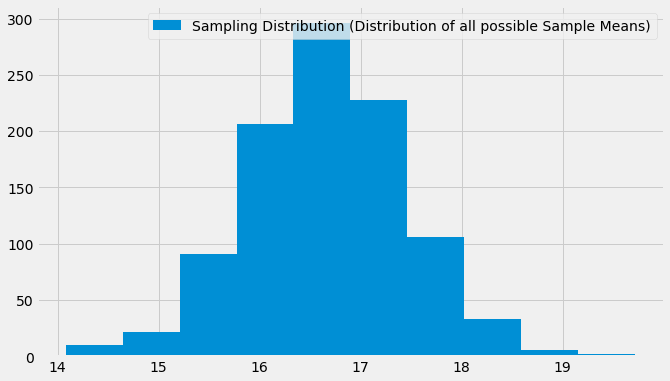

In [19]:
plt.hist(sample_means, label='Sampling Distribution (Distribution of all possible Sample Means)')
plt.legend()

### CLT vs Boostrapping

- The CLT and Boostrapping are two ways of approximating a sampling distribution.
    - How different could our estimate have been?
- However, the CLT is **only** useful when talking about the sample mean (or sample sum).
- The boostrap is more generally useful. Example: the sample median.

### When to use the CLT vs the Boostrap

- If we're talking about the sample mean, use the CLT.
- *Could* use the boostrap, but it's less accurate/slower.
- If we're talking about another statistic (e.g., median), use the bootstrap.

## Concept 6: Confidence Intervals

### Confidence Intervals

- How different could our estimate have been?
- Instead of giving a single estimate, give an interval and a "confidence level".
- E.g., "I'm 95% sure that the population mean flight delay is between 14 and 17".
- More formally it means that, if we repeated the sampling method many times, ~95% of intervals would capture the true population mean. 
- The confidence is in the method, not the particular CI
- It does not mean that 95% of flight delay data is between 14 and 17.

### CIs and the Sampling Distribution

- If we have a sampling distribution, we can construct a CI (no matter how we got the sampling distribution).

In [20]:
import scipy.stats

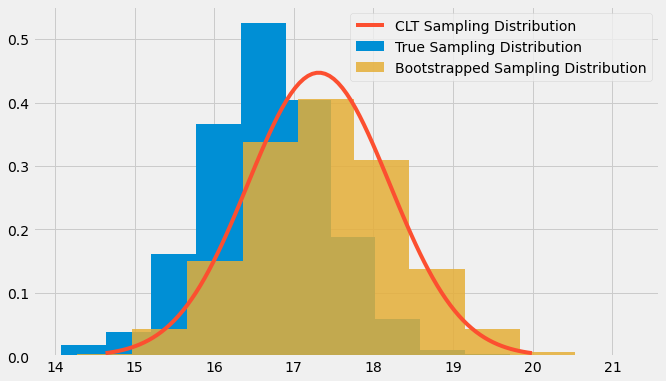

In [43]:
# true sample means
plt.hist(sample_means, density=True, label='True Sampling Distribution')

# central limit theorem
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), label='CLT Sampling Distribution')

# bootstrapped sample means
plt.hist(bootstrap_sample_means, density=True, alpha=0.85, label='Bootstrapped Sampling Distribution')

plt.legend()
plt.show()

### Constructing CIs

- An $x$% CI contains the middle $x$% of the sampling distribution.
- Two ways:
    1. If we have a bunch of sample statistics (like from the boostrap), we can use `np.percentile`.
    2. If we're using the CLT, we can use the rule of thumb: 95% of normal curve is within 2 SDs of mean.

### A) Directly from the True Sampling Distribution (Which is not possible practically)

In [22]:
[left_sms, right_sms] = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)
[left_sms, right_sms]

[15.029074999999999, 18.1860375]

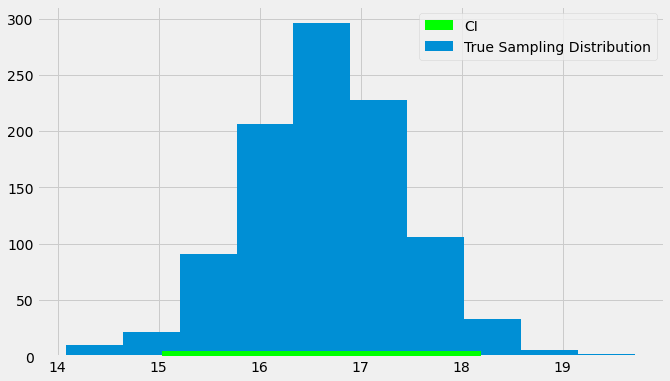

In [44]:
plt.hist(sample_means, label='True Sampling Distribution')
plt.plot([left_sms, right_sms], [0,0], color='lime', linewidth=10, zorder=10, label='CI')
plt.legend()

### B) From the Boostrap Sampling Distribution

In [24]:
[left_boot, right_boot] = np.percentile(bootstrap_sample_means, 2.5), np.percentile(bootstrap_sample_means, 97.5)
[left_boot, right_boot]

[15.584950000000001, 19.297]

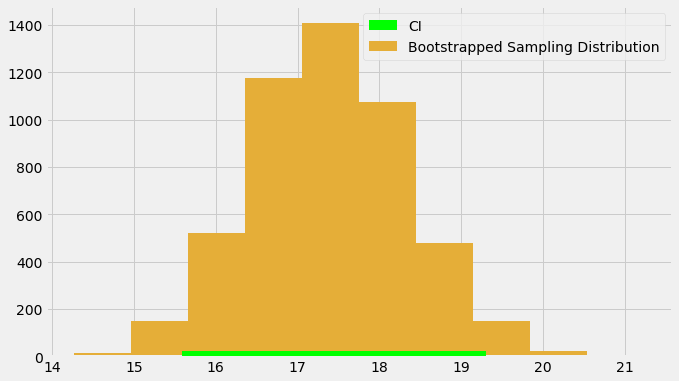

In [25]:
plt.hist(bootstrap_sample_means, color='C2', label='Bootstrapped Sampling Distribution')
plt.plot([left_boot, right_boot], [0,0], color='lime', linewidth=10, zorder=10, label='CI')
plt.legend()

### C) From the CLT

In [26]:
import scipy.stats

In [27]:
[left_clt, right_clt] = [
    original_sample.get('Delay').mean() - 2 * np.std(original_sample.get('Delay')) / np.sqrt(2000),
    original_sample.get('Delay').mean() + 2 * np.std(original_sample.get('Delay')) / np.sqrt(2000),
]

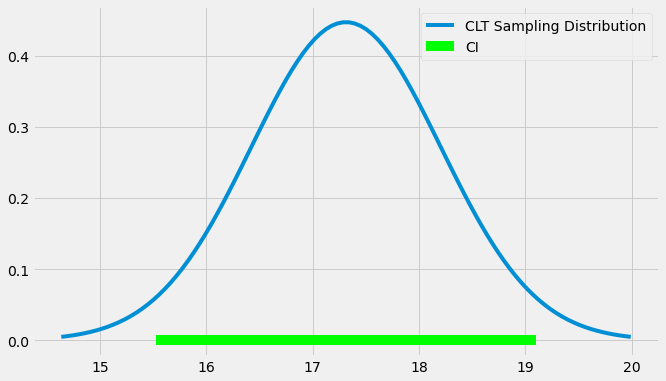

In [46]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), label='CLT Sampling Distribution')
plt.plot([left_clt, right_clt], [0,0], color='lime', linewidth=10, zorder=10, label='CI')
plt.legend()

### Comparison

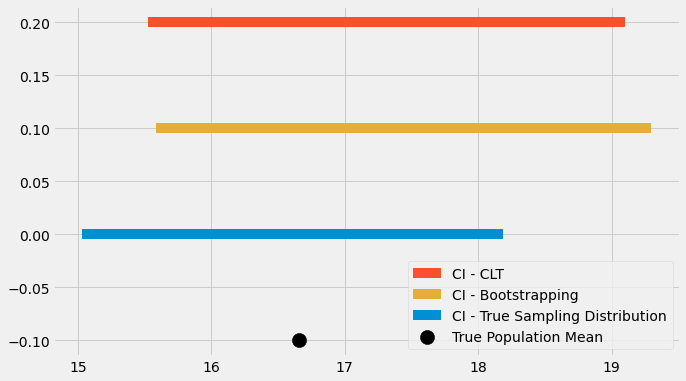

In [47]:
plt.plot([left_clt, right_clt], [.2, .2], color='C1', linewidth=10, zorder=10, label='CI - CLT')
plt.plot([left_boot, right_boot], [.1,.1], color='C2', linewidth=10, zorder=10, label='CI - Bootstrapping')
plt.plot([left_sms, right_sms], [0,0], color='C0', linewidth=10, zorder=10, label='CI - True Sampling Distribution')
plt.scatter(population.get('Delay').mean(), -.1, color='black', s=200, label='True Population Mean')
plt.legend()

### Accuracy

- The Boostrap and CLT are *approximations*.
- As the sample size increases, their estimates improve.

## Concept 7: Hypothesis Testing

### Assessing Models

- We have a *model* of reality (a set of assumptions)
    - Example: jury panels are selected at random from eligible population
- Is the model plausible or unlikely?
- We can use probability and simulation to assess its likelihood.

### Null and Alternative Hypotheses

- The **null** hypothesis states that a population parameter (such as the mean, the standard deviation, and so on) is equal to a hypothesized value. The null hypothesis is often an initial claim that is based on previous analyses or specialized knowledge.
- The **alternative** hypothesis states that a population parameter is smaller, greater, or different than the hypothesized value in the null hypothesis. The alternative hypothesis is what you might believe to be true or hope to prove true. 
- The null hypothesis is (usually) precise and specific enough that it allows us to simulate.

### Example

I think a coin is unfair. To test it, I make the following hypotheses:

- Null: the coin is fair 
    - (P(heads) = .5)
- Alternative: the coin is not fair 
    - (P(heads $\neq$ .5)

### Example

I think a coin is *biased towards heads*. I make the following hypotheses:
    
- Null: the coin is fair
    - (P(heads) = .5)
- Alternative: the coin is unfair and biased towards heads
    - (P(heads) > .5)

### Workflow

- Flip the coin a bunch of times, count *observed* numbers of heads.
- Is what we observed consistent with the null model, or very unlikely?
- We need probability of seeing what we observed under the null hypothesis.

### Test Statistics

- We must have a way of measuring how far we are from what is expected under the null.
- We need to choose a *test statistic*.
- The larger (in magnitude) the test statistic, the more extreme.
- Choice depends on the *alternative* hypothesis.

### Possible Test Statistics

- Alternative: the coin is not fair
- Possible test statistics:
    - the absolute difference between proportion of heads and 50%
    - the absolute difference between number of heads and 50
    - the TVD between sample distribution of heads/tails and the uniform distribution
    - ...

### Example

- Alternative: the coin is not fair, and *biased towards heads*.
- The statistic should be larger the more extreme the outcome.
- Possible test statistics:
    - the number of heads
    - the signed difference between the number of heads and 50
    - the signed difference between the proportion of heads and 50%

### Experiment Set-up

- You flip a coin 100 times and see 57 heads.
- Test alternative hypothesis: coin is biased towards heads.
- I.e., what is the probability of seeing 57 heads if coin is indeed fair?
- This is the *p-value* - The probability of seeing such or extreme observation if the null hypothesis is true.

In [30]:
counts = np.array([])
for i in np.arange(1000):
    # flip fair coin 100 times
    flips = np.random.choice(['H', 'T'], 100)
    
    count = np.count_nonzero(flips == 'H')
    counts = np.append(counts, count)

In [31]:
counts

array([45., 55., 40., 57., 54., 54., 43., 56., 47., 48., 51., 44., 49.,
       52., 51., 50., 49., 42., 55., 54., 58., 45., 47., 59., 51., 36.,
       41., 52., 53., 46., 49., 52., 48., 45., 51., 46., 43., 53., 47.,
       52., 46., 50., 52., 52., 55., 42., 56., 48., 55., 49., 46., 48.,
       58., 58., 51., 51., 56., 48., 45., 52., 52., 53., 45., 50., 48.,
       58., 47., 48., 57., 49., 52., 46., 46., 57., 49., 51., 57., 49.,
       51., 42., 49., 45., 50., 56., 51., 47., 47., 52., 53., 43., 52.,
       54., 50., 59., 45., 45., 33., 47., 47., 37., 51., 50., 52., 54.,
       47., 47., 47., 45., 45., 51., 52., 47., 54., 50., 51., 49., 53.,
       60., 54., 48., 42., 56., 44., 54., 54., 49., 47., 52., 62., 52.,
       41., 37., 46., 52., 54., 39., 53., 52., 50., 51., 51., 52., 55.,
       54., 58., 51., 50., 50., 53., 58., 51., 55., 46., 53., 49., 49.,
       59., 40., 44., 45., 55., 49., 49., 51., 44., 52., 50., 51., 43.,
       40., 53., 47., 57., 52., 56., 60., 54., 58., 45., 53., 58

In [32]:
np.count_nonzero(counts >= 57) / 1000

0.11

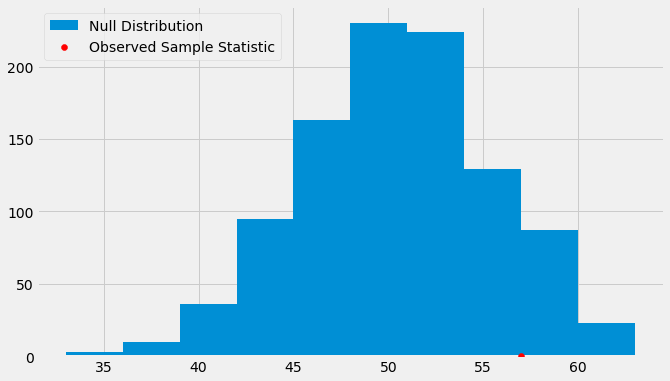

In [33]:
plt.hist(counts, label='Null Distribution')
plt.scatter(57, 0, color='red', zorder=10, label='Observed Sample Statistic')
plt.legend()

### Rejecting and Failing to Reject

- The p-value tells us the probability of seeing the observed outcome or extreme if the null is true.
- If we had set a "confidence threshold" before the experiment, we can reject at that confidence level.
- E.g., if we had set a 5% threshold (95% confidence) we would fail to reject.
- Still, a p-value of $\approx$ 10% means that we were getting close to rejecting.

### Accepting a null hypothesis?

- We never "accept" a null hypothesis, we only "fail to reject". Why?
- If we see 50 heads and 50 tails, this isn't evidence that the coin is fair; only that it is close to fair.
- It would be wrong to say that we are "95% sure that the coin is fair".

## Concept 8: A/B Testing

### A/B Testing

- A type of hypothesis test.
- We have two groups. Do they come from the same distribution?
- Example: baby weights for mothers who smoked / didn't smoke.

### Idea

- The null hypothesis: they come from the same distribution.
- We can't directly simulate using the null.
- Permuting group labels is like sampling more data.

### Permutation Tests

- Given a table, one column with group labels, another with quantity of interest.
- Repeatedly:
    - Shuffle the group labels.
    - Compute a test statistic measuring difference between groups.
- Plot the distribution of differences, use to calculate p-value.

## Concept 9: Linear Regression

### Lets make a scatter plot:
 - Below is some randomlly generated data, normally you would use real world data

<AxesSubplot:xlabel='Data_A', ylabel='Data_B'>

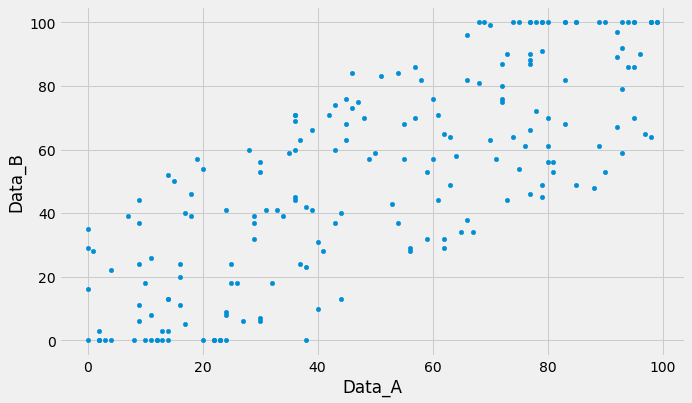

In [34]:
# lets create some random data
randomData = bpd.DataFrame(data = {
    "Data_A" : (np.random.randint(0,100,size=(200)))
}, index=np.arange(200))

# create a random set of data that is +/-20 from generated Data A  
randomCol = randomData.get('Data_A')
newCol = np.array([])

for i in range(randomCol.shape[0]):
    newCol = np.append(newCol, int(randomCol.iloc[i] + np.random.randint(-40,40)))
    #check within 0 and 100
    if newCol[i] > 100:
        newCol[i] = 100
    if newCol[i] < 0:
        newCol[i] = 0

randomData=randomData.assign(Data_B = newCol)


#plot the data
randomData.plot(kind='scatter', x='Data_A', y='Data_B')

### Converting columns to standard units
* makes different scatterplots comparable
* allows x and y axis to be "similarly scaled"
    - both axes measure standard deviations from their means
* doesn't change shape of the scatterplot (conversion is linear)

In [35]:
# a simple function to help up standardize the units
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    any_numbers = np.array(any_numbers)
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

<AxesSubplot:xlabel='Data_A_su', ylabel='Data_B_su'>

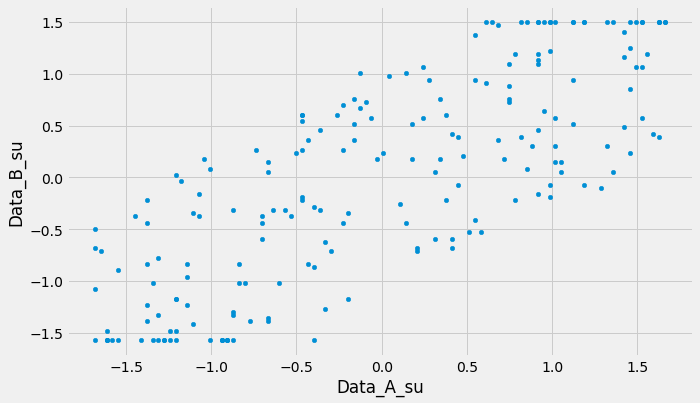

In [36]:
# Lets standardize the original (randomlly generated) Data
Data_A_su = standard_units(randomData.get('Data_A'))
Data_B_su = standard_units(randomData.get('Data_B'))

#make a new data frame
randomData_su = bpd.DataFrame()
randomData_su = randomData_su.assign(Data_A_su = Data_A_su)
randomData_su = randomData_su.assign(Data_B_su = Data_B_su)

randomData_su

#plot the data
randomData_su.plot(kind='scatter', x='Data_A_su', y='Data_B_su')

### Definition: Correlation Coefficient

**Definition**: The correlation coefficient $r$ of two attributes $x$ and $y$ is the average value of the product of $x$ and $y$ when measured in standard units.

* If `x` and `y` are arrays (i.e. columns in a table): 
```
r = np.mean(x_su * y_su)
```
where `x_su` and `y_su` are `x` and `y` converted to standard units.


* Measures how clustered points are around a straight line (linear association)
* Based on standard units
* $-1 \leq r \leq 1$
    - $r = 1$: scatterplot is a line of slope 1.
    - $r = -1$: scatterplot is a line of slope -1.
* $r = 0$: no linear association; *uncorrelated*.

In [37]:
r = (randomData_su.get('Data_A_su') * randomData_su.get('Data_B_su')).mean()
r

0.7906456622381103

### Using the correlation coefficient for prediction
In standard units:
* The line through $(0,0)$ with slope $r$ is called the regression line.
* If the association between attributes is linear, the graph of averages is approximately the regression line.
* If the line is given by $f(x) = mx + b$, then the prediction for $x$ is given by $f(x)$.

### Regression line equation:

* In standard units:
$$ y_{su} = r \times x_{su} $$
* In original units, 
    - where $m_x$, $m_y$ are the averages of $x$ and $y$
    - where $s_x$, $s_y$ are the standard deviations of $x$ and $y$,
$$\frac{(y - m_y)}{s_y} = r \times \frac{(x - m_x)}{s_x}$$
* This equation reworked into the point-slope form of a line:
$$(y - m_y) = \left(\frac{r\cdot s_y}{s_x}\right)(x - m_x)$$

* Or in the slope-intercept form:

$$y = \left(\frac{r\cdot s_y}{s_x}\right)x + \left(m_y - \frac{r\cdot s_y\cdot m_x}{s_x}\right)$$

### Slope and intercept

* The regression line is given by $y = mx + b$, where:
    - the slope $m$ is: $$m = r\cdot\frac{SD\ of\ x}{SD\ of\ y}$$
    - the y-intercept $b$ is: $$b = (avg\ of\ y) - m\cdot(avg\ of\ x)$$


In [38]:
#define the correlation, slop and intercept function
def correlation(t, x, y):
    return np.mean(standard_units(t.get(x))*standard_units(t.get(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)"""
    r = correlation(t, x, y)
    return r * np.std(t.get(y)) / np.std(t.get(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)"""
    return t.get(y).mean() - slope(t, x, y) * t.get(x).mean()


Slope: 0.8697911439607885  y-intercept: 7.890703119313123


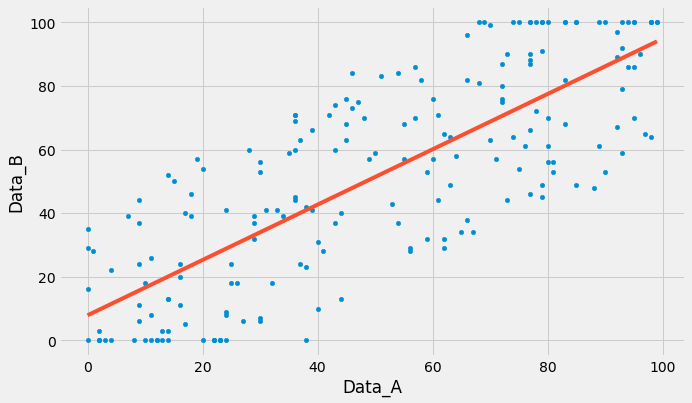

In [39]:
#use our defined functions to find slope and intercept
m = slope(randomData, 'Data_A', 'Data_B')
b = intercept(randomData, 'Data_A', 'Data_B')

print('Slope: ' + str(m) + '  y-intercept: ' + str(b))

#polt with our dataFrame:
randomData.plot(kind='scatter', x='Data_A', y='Data_B')
x = np.arange(0,100)
plt.plot(x, m * x + b, color='C1');


## Good luck on the final & thanks for a great quarter! 